#### **I chose this dataset because it presents several challenges, it is relatively small with  about 615 rows, and contains many missing values and outliers. I addressed these issues through data preprocessing and was able to achieve an accuracy of 81% and 96% recall, which is a strong result given the limited size of the data."**

# **Loan Approval Prediction**

### This project aims to predict whether a loan application will be approved or not and automate the loan process by macine learning based on customer data


### Steps of the Project

1. **Check missing and duplicate values**  
   Check missing values (data has many nulls and it handeled in machine learning pipline ), and removed any duplicate rows.

2. **Univariate analysis**  
   Looked at each column alone to see its values, Handle any wrong data, and check the distribution. Fixed issues when needed.

3. **Bivariate analysis**  
   Checked how each feature is related to the target (loan approval) to find important patterns.

4. **Feature extraction**  
   Made new features from the data to help the model learn better and improve accuracy.

5. **Feature importance**
Checked important features using correlation and ExtraTreesClassifier to find factors that affect loan approval, and removed low-importance ones.

6. **ML Pipelines**  
   Created two pipelines: one for categorical data and one for numeric data. These handled missing values, encoding , scaling and Imbalanced classes.

7. **Model training with cross-validation and pipline**  
   Trained several models using pipelines and cross-validation to avoid data leakage and get fair results.

8. **Choose best model**  
   Picked **SVM** as the best model with **84% accuracy** and **96% recall**, and checked train vs test results to confirm there was no overfitting.

9. **tuning**  
   Did not tune parameters because the dataset was small and past tuning attempts reduced performance.


In [3]:
import plotly.express as px
import pandas as pd
import numpy as np

# for plotly visualizations in SVG format for github
import plotly.io as pio
pio.renderers.default = 'svg'



In [4]:
# import data
df = pd.read_csv('/Users/mohammedmahmood/Desktop/Data projects/Projects/Data science/Loan Default Detection Prediction/Data /Loan_Default_Detection_Prediction.csv')
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
# some info about columns
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [6]:
df.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


# duplication rows

In [7]:
df.duplicated().sum()

np.int64(0)

# Null Values

In [8]:
df.isna().mean() * 100

Loan_ID              0.000000
Gender               2.117264
Married              0.488599
Dependents           2.442997
Education            0.000000
Self_Employed        5.211726
ApplicantIncome      0.000000
CoapplicantIncome    0.000000
LoanAmount           3.583062
Loan_Amount_Term     2.280130
Credit_History       8.143322
Property_Area        0.000000
Loan_Status          0.000000
dtype: float64

### I will handle the null values within the preprocessing pipeline to ensure proper data preprocessing and prevent data leakage

In [9]:
# Unnecessary column in preidction and Anlysis
df.drop("Loan_ID" , axis = 1 , inplace=True )
df.reset_index(drop=True, inplace=True)

In [10]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')

# Univariate analysis
### In this step I will go through each column individually to identify and address any issues, and do EDA to gain a deeper understanding of the features.

## Gender

In [11]:
# import needed libraries
import pandas as pd
import numpy as np
import plotly.express as px
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [12]:
df.Gender.unique()

array(['Male', 'Female', nan], dtype=object)

In [13]:
df.Gender.value_counts()

Gender
Male      489
Female    112
Name: count, dtype: int64

## Married

In [14]:
df.Married.unique()

array(['No', 'Yes', nan], dtype=object)

In [15]:
df.Married.value_counts()

Married
Yes    398
No     213
Name: count, dtype: int64

## Dependents

In [16]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [17]:
df.Dependents.value_counts()

Dependents
0     345
1     102
2     101
3+     51
Name: count, dtype: int64

In [18]:
df.Dependents.unique()
## +3, mean greter than 3 Dependents

array(['0', '1', '2', '3+', nan], dtype=object)

In [19]:
df.Dependents.info()

<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: Dependents
Non-Null Count  Dtype 
--------------  ----- 
599 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB


In [20]:
df.Dependents.info()

<class 'pandas.core.series.Series'>
RangeIndex: 614 entries, 0 to 613
Series name: Dependents
Non-Null Count  Dtype 
--------------  ----- 
599 non-null    object
dtypes: object(1)
memory usage: 4.9+ KB


## Education

In [21]:
df.Education.unique()

array(['Graduate', 'Not Graduate'], dtype=object)

## Self_Employed

In [22]:
df.Self_Employed.unique()

array(['No', 'Yes', nan], dtype=object)

## ApplicantIncome

In [23]:
df.ApplicantIncome.describe()

count      614.000000
mean      5403.459283
std       6109.041673
min        150.000000
25%       2877.500000
50%       3812.500000
75%       5795.000000
max      81000.000000
Name: ApplicantIncome, dtype: float64

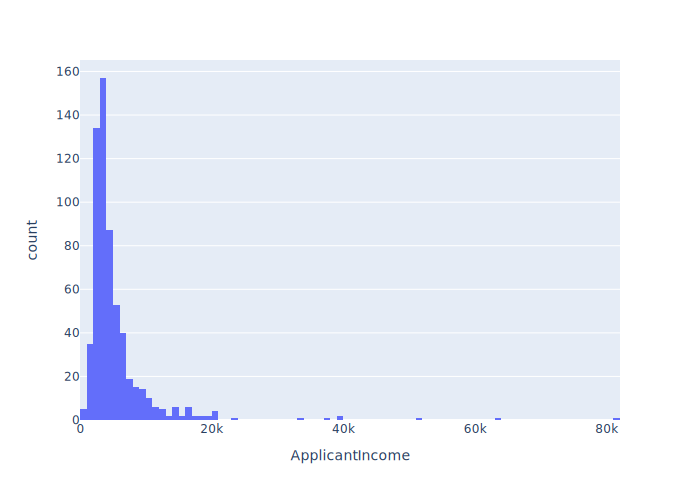

In [24]:
fig = px.histogram(df, x= "ApplicantIncome")

fig.show()

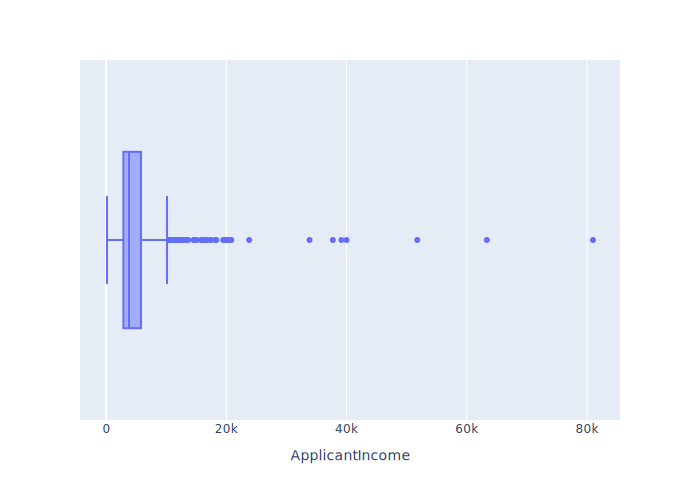

In [25]:
fig = px.box(df, x= "ApplicantIncome")

fig.show()

In [26]:
df = df[df['ApplicantIncome'] != 81000]

### **Taking the log of the column helps handle skewness and outliers**

In [27]:
df["log_ApplicantIncome"] = np.log(df["ApplicantIncome"])

/var/folders/0f/sg0d5c153zv11896v810g2_80000gn/T/ipykernel_62862/4235260786.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



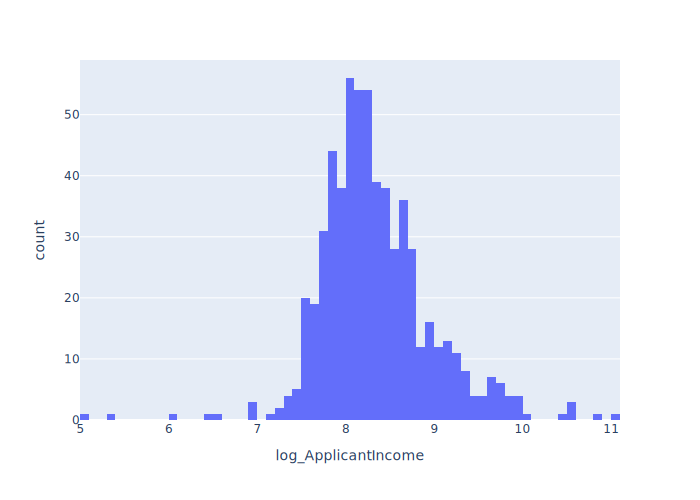

In [28]:
fig = px.histogram(df, x= "log_ApplicantIncome")

fig.show()

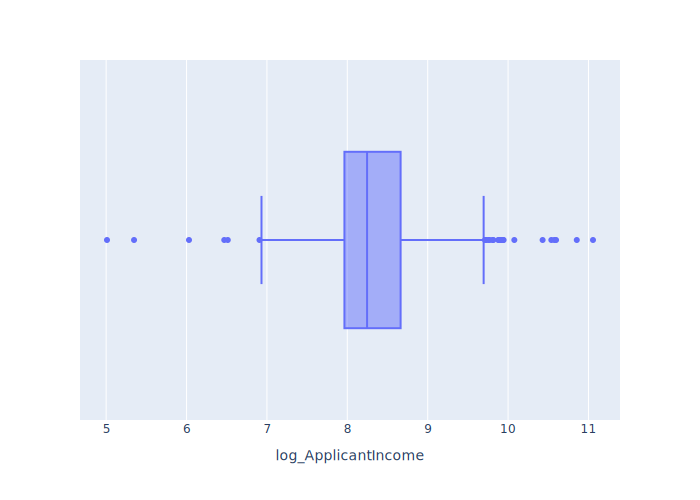

In [29]:
fig = px.box(df, x= "log_ApplicantIncome")

fig.show()

### **As we saw the log transformation handled skewness and outliers**

## LoanAmount

In [30]:
df.LoanAmount.describe()

count    591.000000
mean     146.050761
std       85.206534
min        9.000000
25%      100.000000
50%      128.000000
75%      167.500000
max      700.000000
Name: LoanAmount, dtype: float64

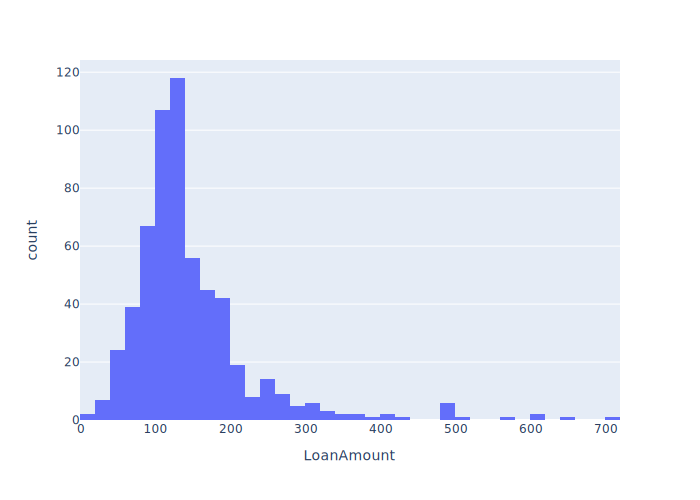

In [31]:
fig = px.histogram(df, x= "LoanAmount")
fig.show()

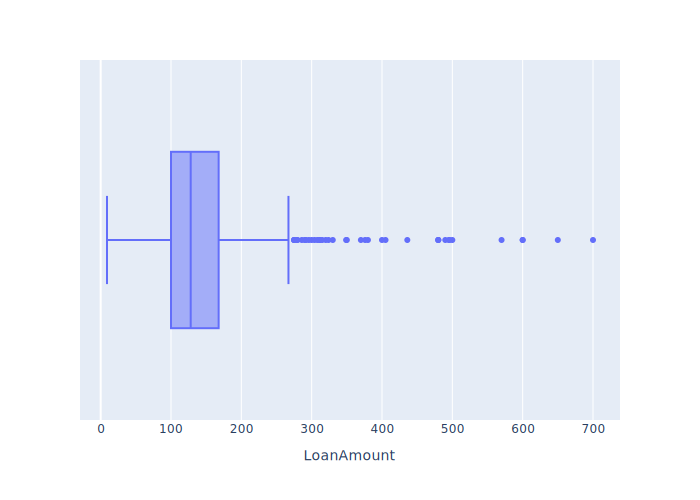

In [32]:
fig= px.box(df, x= "LoanAmount")

fig.show()

### **Taking the log of the column helps handle skewness and outliers**

In [33]:
df["log_LoanAmount"] = np.log(df["LoanAmount"])

/var/folders/0f/sg0d5c153zv11896v810g2_80000gn/T/ipykernel_62862/1791776846.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



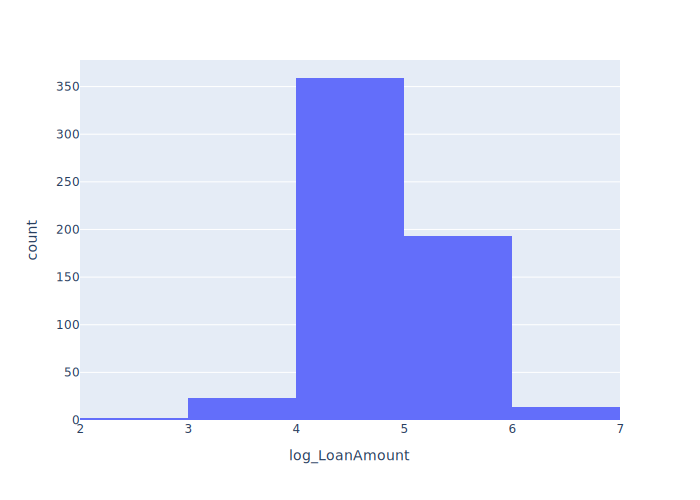

In [34]:
fig = px.histogram(df, x= "log_LoanAmount")

fig.show()

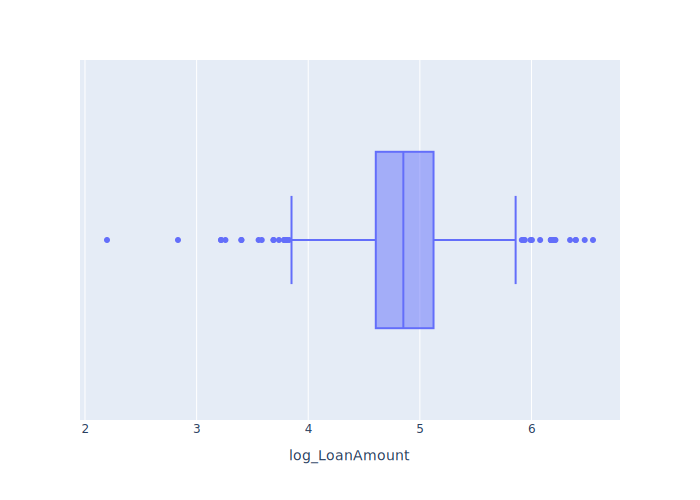

In [35]:
fig = px.box(df, x= "log_LoanAmount")

fig.show()

In [36]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'log_ApplicantIncome', 'log_LoanAmount'],
      dtype='object')

## Loan_Amount_Term

In [37]:
df.Loan_Amount_Term.describe()

count    599.000000
mean     341.969950
std       65.170672
min       12.000000
25%      360.000000
50%      360.000000
75%      360.000000
max      480.000000
Name: Loan_Amount_Term, dtype: float64

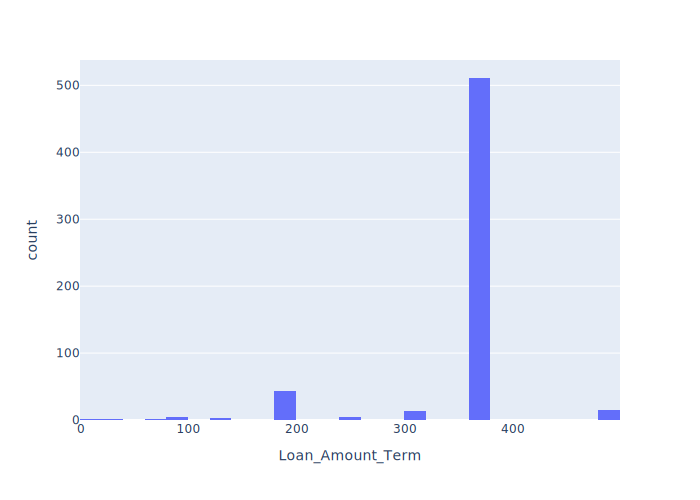

In [38]:
fig = px.histogram(df, x= "Loan_Amount_Term" )

fig.show()

## Credit_History

In [39]:
df.Credit_History.unique()

array([ 1.,  0., nan])

In [40]:
df.Credit_History.value_counts()

Credit_History
1.0    475
0.0     88
Name: count, dtype: int64

## Property_Area

In [41]:
df.Property_Area.unique()

array(['Urban', 'Rural', 'Semiurban'], dtype=object)

In [42]:
df.Property_Area.value_counts()

Property_Area
Semiurban    233
Urban        202
Rural        178
Name: count, dtype: int64

## Loan_Status

In [43]:
df["Loan_Status"]. value_counts()

Loan_Status
Y    422
N    191
Name: count, dtype: int64

In [44]:
# Map Target
df["Loan_Status"] = df["Loan_Status"].map({"N" : 0, "Y": 1})

/var/folders/0f/sg0d5c153zv11896v810g2_80000gn/T/ipykernel_62862/2247189305.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



### **Target is immbalanced and wil handle it**

# bivariate analysis

### **bivariate analysis was performed to examine the relationships between features and the target**

In [45]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'log_ApplicantIncome', 'log_LoanAmount'],
      dtype='object')

## 1- Does gender influence loan approval rates?

In [46]:
df.Gender.value_counts()

Gender
Male      488
Female    112
Name: count, dtype: int64

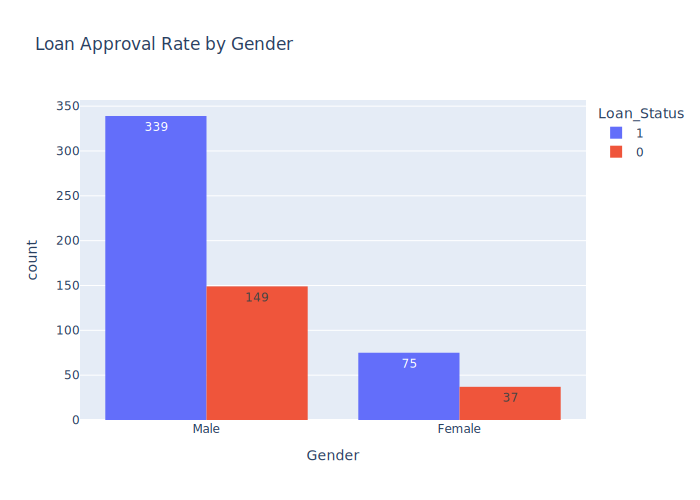

In [47]:
fig = px.histogram(
    df,
    x="Gender",
    color="Loan_Status",
    barmode="group",
    title="Loan Approval Rate by Gender",
    text_auto=True
)

fig.show()

### Summary Insight:

#### - **Male applicants have a much higher number of approvals (339) compared to rejections (150).**

#### - **Female applicants also have more approvals (75) than rejections (37), but their total applications are far fewer than males**


## 2-Is there a relationship between number of dependents and loan approval?

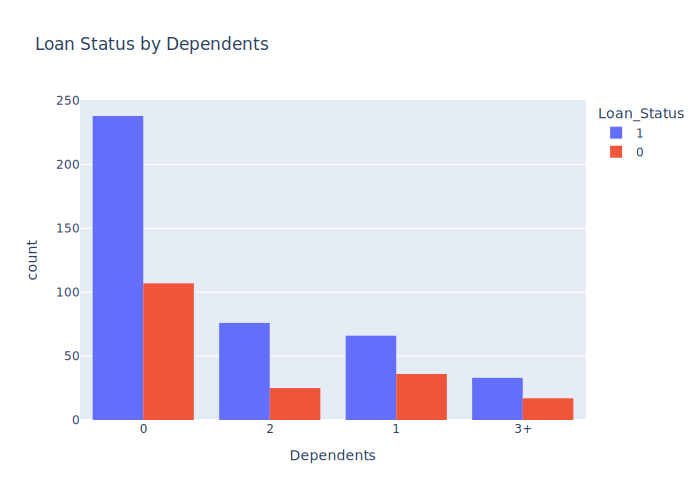

In [48]:
fig = px.histogram(df, x='Dependents', color='Loan_Status',
                   barmode='group',
                   title='Loan Status by Dependents ')
fig.show()


### Summary Insight:
#### **Applicants with 0 dependents have the highest approval counts, likely due to lower financial burdens**

## 3-Do property area affect loan approval?

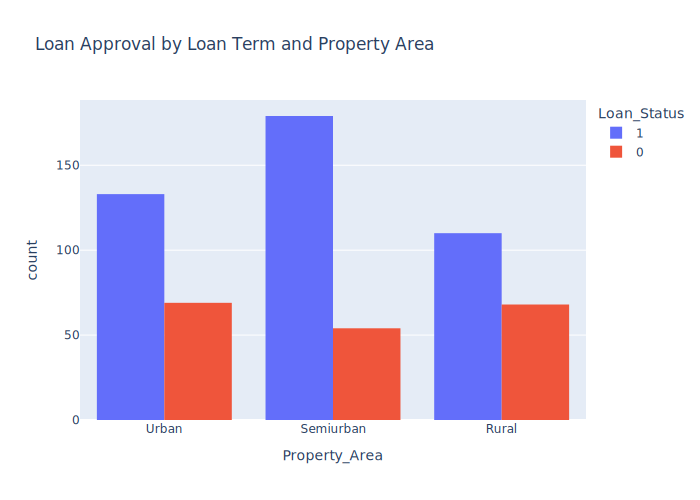

In [49]:
fig = px.histogram(df, x= "Property_Area", color='Loan_Status',
                    barmode='group',
                   title='Loan Approval by Loan Term and Property Area')
fig.show()


### Summary Insight:
#### **Semiurban areas have the highest approval count, followed by rural and urban**

## 4-Are shorter or longer loans more likely to be approved?

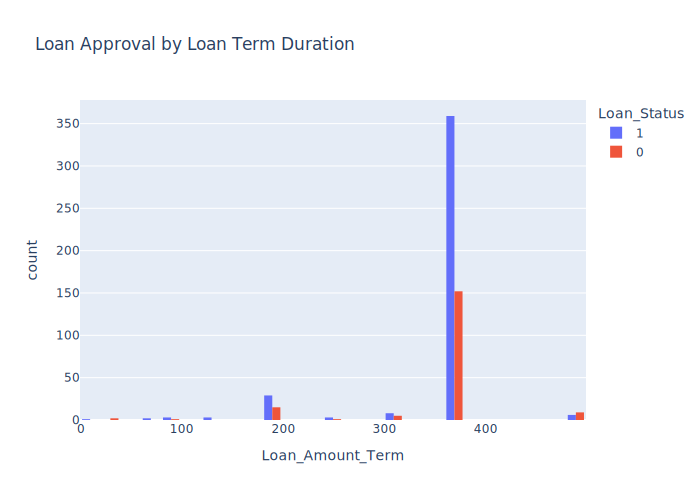

In [50]:
fig = px.histogram(df, x='Loan_Amount_Term', color='Loan_Status', barmode='group',
                   title='Loan Approval by Loan Term Duration')
fig.show()

### Summary Insight:
#### **Longer loans are more likely to be approved**

## 5- How does credit history impact loan approval?

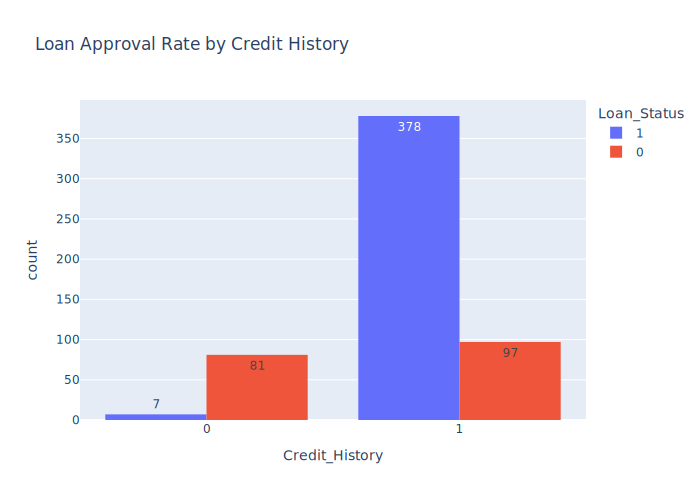

In [51]:
fig = px.histogram(
    df,
    x="Credit_History",
    color="Loan_Status",
    barmode="group",
    title="Loan Approval Rate by Credit History",
    text_auto=True
)

fig.show()

### Summary Insight:

#### - **Applicants with a good credit history (1) have a very high approval count (378) compared to rejections (97), showing strong positive influence on approval.**

#### - **Applicants with no/poor credit history (0) face a significant disadvantage — only 7 approvals vs 82 rejections.**

#### - **Credit history is a critical factor in loan approval, with a clear pattern that having it significantly boosts chances.**

## 6- Does total household income affect loan approval?

In [52]:
# create Total_Income to make analysis
df["Total_Income"] = df["ApplicantIncome"] + df["CoapplicantIncome"]

/var/folders/0f/sg0d5c153zv11896v810g2_80000gn/T/ipykernel_62862/1360129467.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



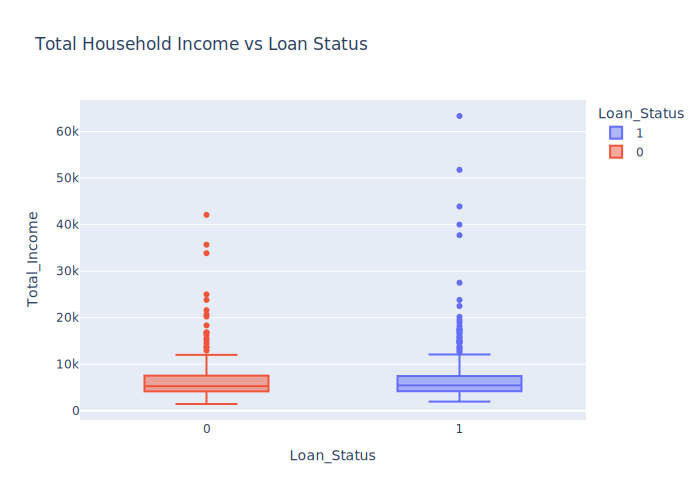

In [53]:
fig = px.box(
    df,
    x="Loan_Status",
    y="Total_Income",
    color="Loan_Status",
    title="Total Household Income vs Loan Status"
)

fig.show()

### Summary Insight:

#### - **The median total household income is quite similar for both approved and rejected loans, suggesting income alone isn’t a strong approval driver.**

#### - **There are more high-income outliers among rejected applications, meaning some high earners still face denials — likely due to other factors like credit history or loan-to-income ratio.**



In [54]:
df.Married.value_counts()

Married
Yes    397
No     213
Name: count, dtype: int64

In [55]:
df.Dependents.value_counts()

Dependents
0     345
1     102
2     101
3+     50
Name: count, dtype: int64

# Multivariate analysis

## 7-What is Impact of Marital Status and Dependents on Loan Approval

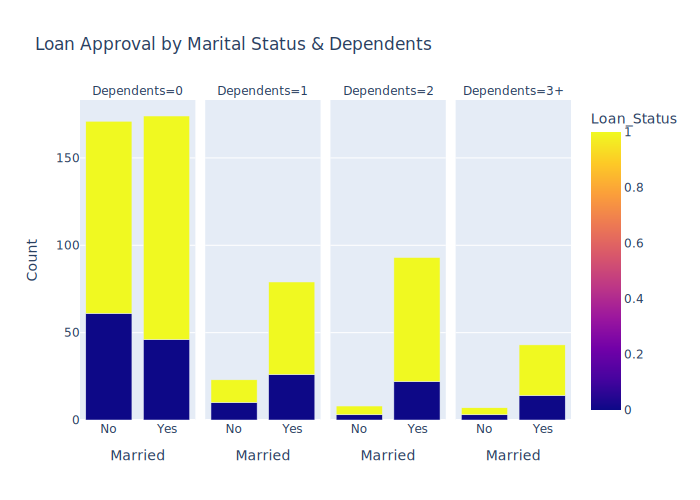

,Married,Dependents,Loan_Status,Count
0,No,0,0,61
1,No,0,1,110
2,No,1,0,10
3,No,1,1,13
4,No,2,0,3
5,No,2,1,5
6,No,3+,0,3
7,No,3+,1,4
8,Yes,0,0,46
9,Yes,0,1,128


In [56]:
married_dependents = df.groupby(['Married','Dependents','Loan_Status']).size().reset_index(name='Count')
fig = px.bar(married_dependents, x='Married', y='Count', color='Loan_Status',
             facet_col='Dependents', barmode='group',
             title='Loan Approval by Marital Status & Dependents')
fig.show()

married_dependents

### insights :
- **Single people with no kids → Highest chance to get loan (best customers)**
- **Married + 1 child → Also very good chance (bank loves them)**
- **Married + 2 children → Okay, but lower chance than 0 or 1 child**
- **Married + 3 or more children → Very high chance of rejection (bank says no most of the time)**
- **Single with 3+ kids → Very rare, but when they apply, bank usually says yes**

------------------------------------------------------------------------------------------------------------------------------------

# Final Recommendations

#### 1- Prioritize Credit History

- **Credit history is the strongest predictor of loan approval. Applicants with good credit should receive priority, while those with poor or missing credit must undergo additional checks.**

#### 2- Use Dependents and Marital Status as Stability Indicators

- **Applicants with 0–1 dependents show the highest approval likelihood.**
**Those with 3+ dependents represent high financial pressure and should be assessed more cautiously.****

#### 3- Do Not Rely on Income Alone

- **Median income is similar across approved and rejected groups.**
**Income should always be evaluated together with loan amount, dependents, and credit history.**

#### 4- Encourage Longer Loan Terms

- **Longer loan durations correlate with higher approval rates because they reduce monthly installment pressure.**
**Applicants on the edge can benefit from extending their loan term.**

#### 5- Incorporate Property Area into Risk Assessment

- **Semiurban applicants have the highest approval rates.**
**Semiurban areas can receive a slight positive score adjustment, while urban areas may need stricter checks.**

#### 6- Treat Gender as a Non-Critical Factor

- **Approval differences come from application volume—not approval bias.**
**Gender should not play a major role in model predictions.**


#### 7- Investigate High-Income Rejections

- **Some high-income applicants are still rejected, which indicates other strong risk signals (e.g., poor credit history or high loan-to-income ratio).**
**These cases should be reviewed with additional scrutiny.**

# Check Outliers

In [57]:
from datasist.structdata import detect_outliers


DF = df.select_dtypes(include="number")

for col in DF.columns:
    outliers = detect_outliers(df, 0, [col])
    print(f"{col}: {len(outliers)} outliers")


ApplicantIncome: 50 outliers
CoapplicantIncome: 18 outliers
LoanAmount: 0 outliers
Loan_Amount_Term: 0 outliers
Credit_History: 0 outliers
Loan_Status: 0 outliers
log_ApplicantIncome: 27 outliers
log_LoanAmount: 0 outliers
Total_Income: 50 outliers


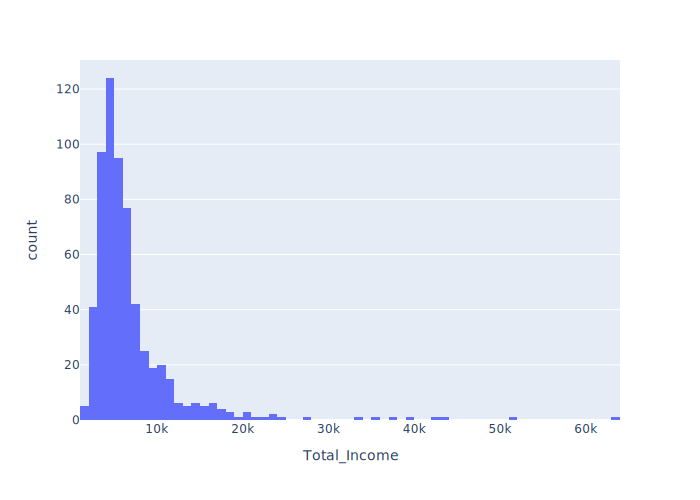

In [58]:
fig = px.histogram(df, x= "Total_Income")

fig.show()

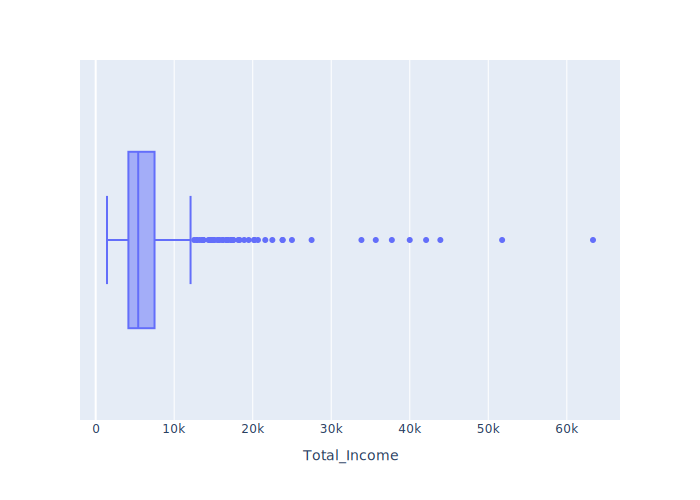

In [59]:
fig = px.box(df, x= "Total_Income")

fig.show()

In [60]:
# Create Total Income
df['Total_Income'] = df['ApplicantIncome'] + df['CoapplicantIncome']

# Filter
high_income = df[df['Total_Income'] > 50000]

# Show approved cases (Loan_Status = 1)
approved = high_income[high_income['Loan_Status'] == 1]
print("Approved Applicants (Loan_Status = 1):")
display(approved[['ApplicantIncome',  'Total_Income', 'Loan_Status']])

# Show rejected case (Loan_Status = 0)
rejected = high_income[high_income['Loan_Status'] == 0]
print("Rejected Applicant (Loan_Status = 0):")
display(rejected[['ApplicantIncome',  'Total_Income', 'Loan_Status']])


Approved Applicants (Loan_Status = 1):


/var/folders/0f/sg0d5c153zv11896v810g2_80000gn/T/ipykernel_62862/1281253443.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



,ApplicantIncome,Total_Income,Loan_Status
171,51763,51763.0,1
333,63337,63337.0,1


Rejected Applicant (Loan_Status = 0):


,ApplicantIncome,Total_Income,Loan_Status


In [61]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'log_ApplicantIncome', 'log_LoanAmount', 'Total_Income'],
      dtype='object')

# Feature Engineering

## 1- Total_Income ( created in bivariate analysis we will check it's distribution & handle outliers )

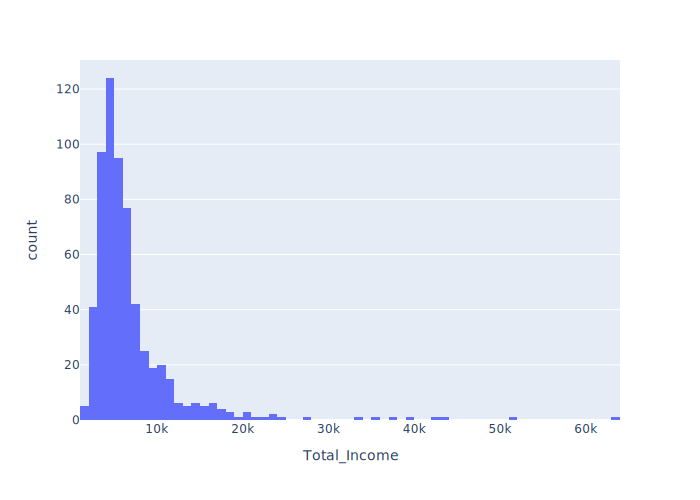

In [62]:
fig = px.histogram(df, x= "Total_Income")

fig.show()

### **Taking the log of the column helps handle skewness and outliers**

In [63]:
# take log for Total_Income  to handle skewness
df["log_Total_Income"] = np.log(df["Total_Income"])

/var/folders/0f/sg0d5c153zv11896v810g2_80000gn/T/ipykernel_62862/1427191323.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



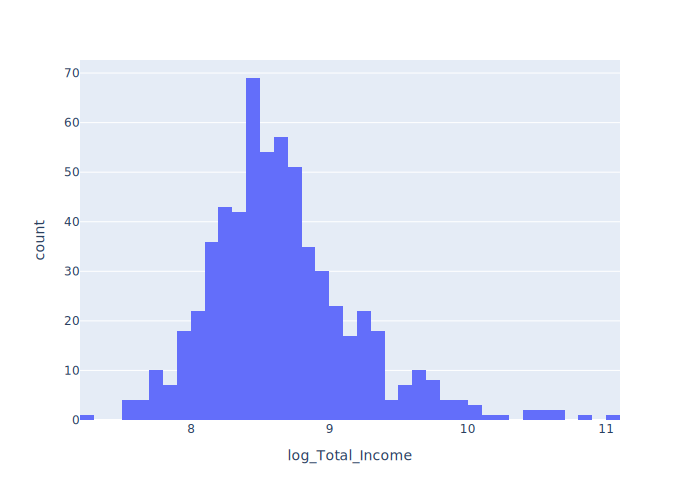

In [64]:
fig = px.histogram(df, x= "log_Total_Income")

fig.show()

In [65]:
from datasist.structdata import detect_outliers

idx = detect_outliers(df, 0, ['log_Total_Income'])
len(idx)

22

## 2- Loan_Monthly_Paid

In [66]:
df.Loan_Amount_Term.unique()

array([360., 120., 240.,  nan, 180.,  60., 300., 480.,  36.,  84.,  12.])

In [67]:
df.LoanAmount.describe()

count    591.000000
mean     146.050761
std       85.206534
min        9.000000
25%      100.000000
50%      128.000000
75%      167.500000
max      700.000000
Name: LoanAmount, dtype: float64

In [68]:
df["Loan_Monthly_Paid"] = round((df["LoanAmount"] * 1000 ) / (df["Loan_Amount_Term"]) , 2 )

/var/folders/0f/sg0d5c153zv11896v810g2_80000gn/T/ipykernel_62862/2978441033.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



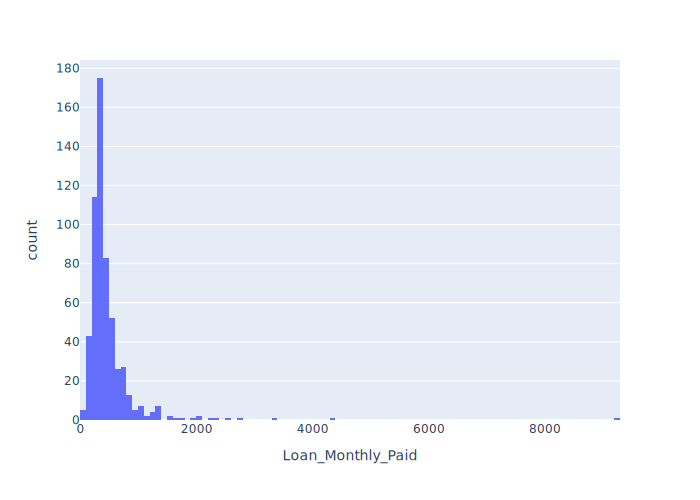

In [69]:
fig = px.histogram(df, x="Loan_Monthly_Paid")

fig.show()

In [70]:
from datasist.structdata import detect_outliers

idx = detect_outliers(df, 0, ['Loan_Monthly_Paid'])
len(idx)

0

In [71]:
df["log_Loan_Monthly_Paid"] = np.log(df["Loan_Monthly_Paid"])

/var/folders/0f/sg0d5c153zv11896v810g2_80000gn/T/ipykernel_62862/3611575322.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



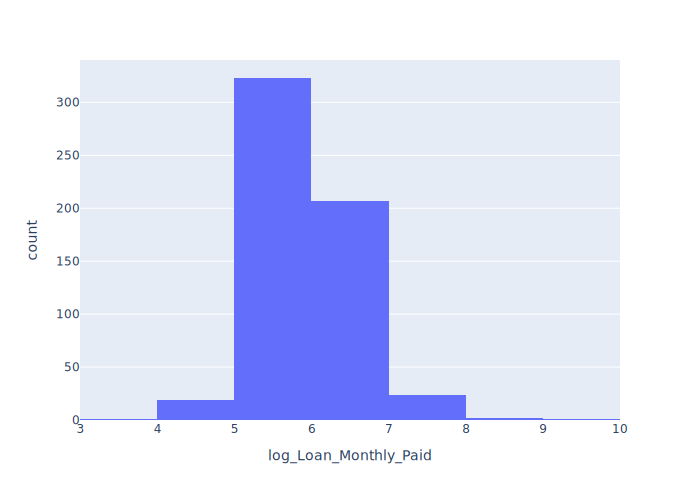

In [72]:
fig = px.histogram(df, x= "log_Loan_Monthly_Paid")

fig.show()

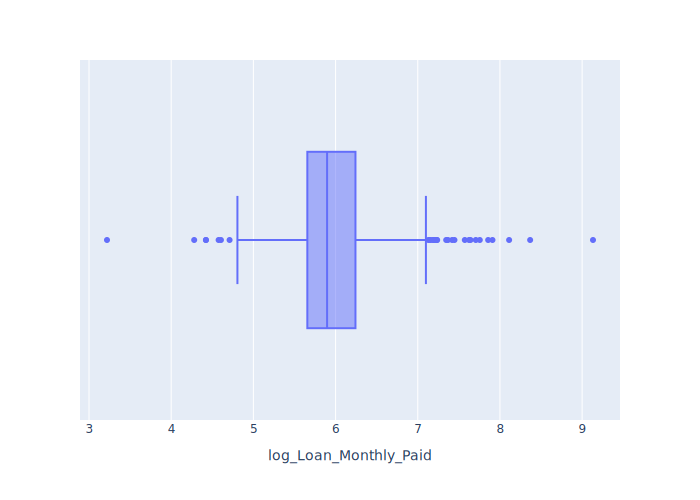

In [73]:
fig = px.box(df, x= "log_Loan_Monthly_Paid" )

fig.show()

In [74]:
from datasist.structdata import detect_outliers

idx = detect_outliers(df, 0, ['log_Loan_Monthly_Paid'])
len(idx)

0

## 3- Income_After_Loan

In [75]:
df[["ApplicantIncome", "Loan_Monthly_Paid"]]

,ApplicantIncome,Loan_Monthly_Paid
0,5849,NaN
1,4583,355.56
2,3000,183.33
3,2583,333.33
4,6000,391.67
...,...,...
609,2900,197.22
610,4106,222.22
611,8072,702.78
612,7583,519.44


In [76]:
df["Income_After_Loan"] = df["ApplicantIncome"] - df["Loan_Monthly_Paid"]

/var/folders/0f/sg0d5c153zv11896v810g2_80000gn/T/ipykernel_62862/2258023430.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [77]:
df.Income_After_Loan.describe()

count      577.000000
mean      4824.777712
std       5218.552128
min      -4625.000000
25%       2463.440000
50%       3418.000000
75%       5208.330000
max      60614.780000
Name: Income_After_Loan, dtype: float64

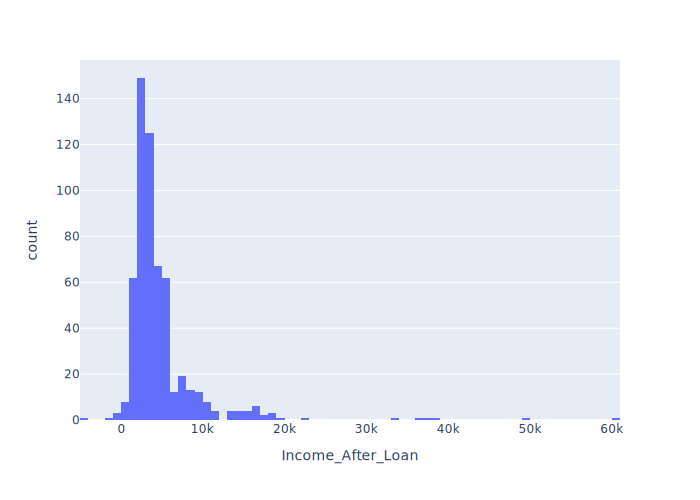

In [78]:
fig = px.histogram(df, x= "Income_After_Loan")
fig.show()

In [79]:
from datasist.structdata import detect_outliers

idx = detect_outliers(df, 0, ['Income_After_Loan'])
len(idx)

0

In [80]:
# take the log if the columns to handle skewness
df["log_Income_After_Loan"] = np.log(df["Income_After_Loan"])

/Library/Frameworks/Python.framework/Versions/3.11/lib/python3.11/site-packages/pandas/core/arraylike.py:399: RuntimeWarning:

invalid value encountered in log

/var/folders/0f/sg0d5c153zv11896v810g2_80000gn/T/ipykernel_62862/388422730.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



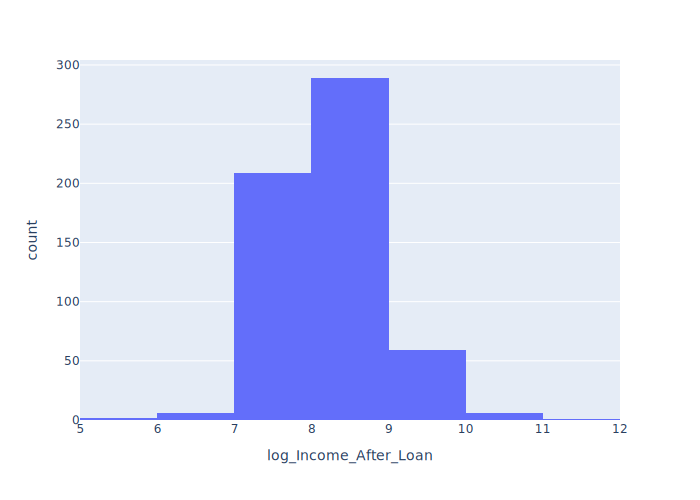

In [81]:
fig = px.histogram(df, x= "log_Income_After_Loan")
fig.show()


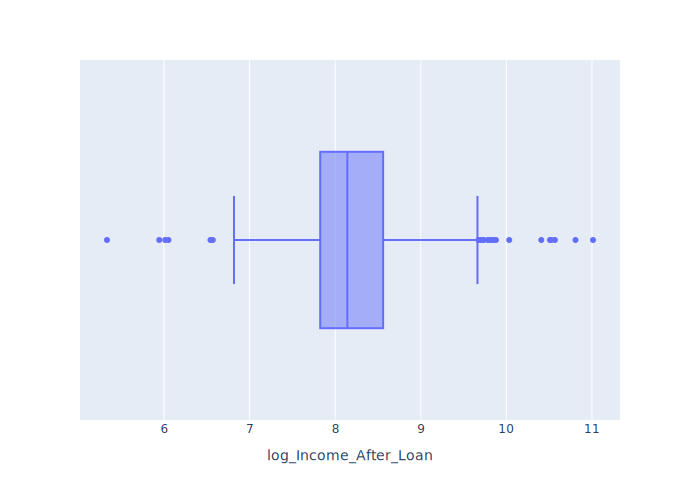

In [82]:
fig = px.box(df, x= "log_Income_After_Loan" )
fig.show()

In [83]:
idx = detect_outliers(df, 1, ['log_Income_After_Loan' ])
len(idx)

0

## 4-Income_to_LoanRatio

In [84]:
df['Income_to_LoanRatio'] = (df['Total_Income'] / df['LoanAmount'].replace(0, np.nan)).round(2)

/var/folders/0f/sg0d5c153zv11896v810g2_80000gn/T/ipykernel_62862/3636882622.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



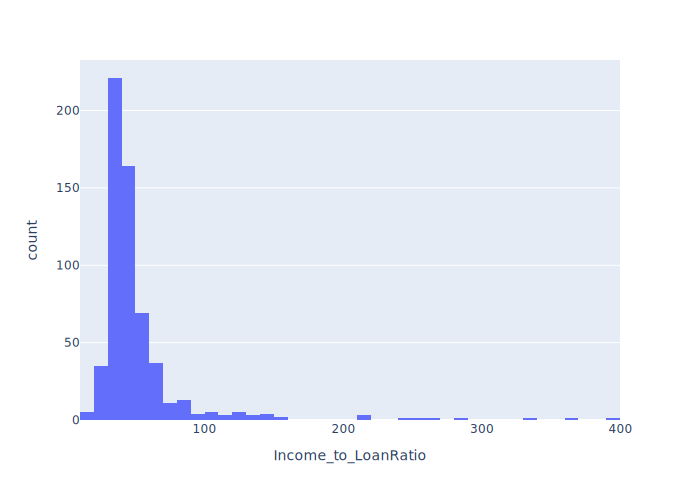

In [85]:
fig = px.histogram(df, x= "Income_to_LoanRatio")

fig.show()

In [86]:
df["log_Income_to_LoanRatio"] = np.log(df["Income_to_LoanRatio"])

/var/folders/0f/sg0d5c153zv11896v810g2_80000gn/T/ipykernel_62862/2072113391.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



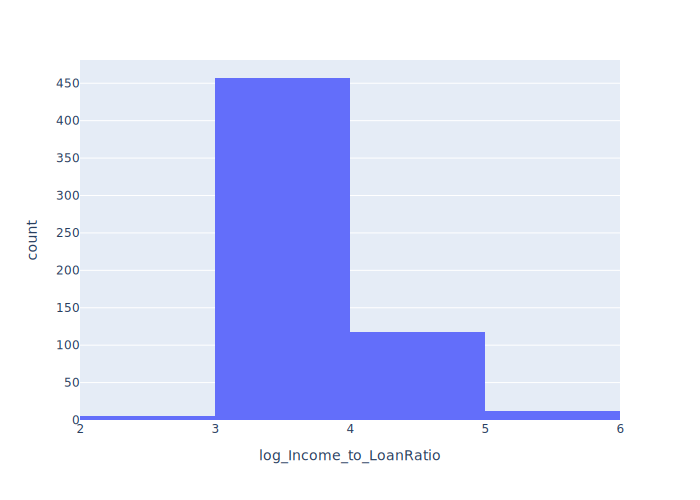

In [87]:
fig = px.histogram(df, x= "log_Income_to_LoanRatio")
fig.show()

In [88]:
df_streamlit= df.copy()

In [89]:
df.columns

Index(['Gender', 'Married', 'Dependents', 'Education', 'Self_Employed',
       'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'log_ApplicantIncome', 'log_LoanAmount', 'Total_Income',
       'log_Total_Income', 'Loan_Monthly_Paid', 'log_Loan_Monthly_Paid',
       'Income_After_Loan', 'log_Income_After_Loan', 'Income_to_LoanRatio',
       'log_Income_to_LoanRatio'],
      dtype='object')

### - streamlit dataframe (contain columns without log for deployment )

In [90]:
df_streamlit.drop(['Loan_Amount_Term', 'log_ApplicantIncome', 'log_LoanAmount', 'log_Total_Income', 'Loan_Monthly_Paid', 'log_Loan_Monthly_Paid', 'log_Income_After_Loan', "log_Income_to_LoanRatio" ] , axis = 1 , inplace = True)

### - Modeling and main dataframe (contain log columns that will using in modelling)

In [91]:
# drop columns that i take log for
df.drop(['ApplicantIncome', 'CoapplicantIncome', 'Total_Income', 'Loan_Monthly_Paid', 'Income_After_Loan', "LoanAmount", "Income_to_LoanRatio"] , axis = 1 , inplace = True)

/var/folders/0f/sg0d5c153zv11896v810g2_80000gn/T/ipykernel_62862/2370530057.py:2: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



## outliers after all handling

In [92]:
from datasist.structdata import detect_outliers


DF = df.select_dtypes(include="number")

for col in DF.columns:
    outliers = detect_outliers(df, 0, [col])
    print(f"{col}: {len(outliers)} outliers")


Loan_Amount_Term: 0 outliers
Credit_History: 0 outliers
Loan_Status: 0 outliers
log_ApplicantIncome: 27 outliers
log_LoanAmount: 0 outliers
log_Total_Income: 22 outliers
log_Loan_Monthly_Paid: 0 outliers
log_Income_After_Loan: 0 outliers
log_Income_to_LoanRatio: 0 outliers


# Feature Importance

## 1- Check Correlation

In [93]:
corr = df.select_dtypes(include="number")
corr = corr.corr()['Loan_Status'].sort_values(ascending=False)
print(corr)

Loan_Status                1.000000
Credit_History             0.559382
log_Income_to_LoanRatio    0.059444
log_ApplicantIncome        0.022514
log_Total_Income           0.019337
log_Income_After_Loan      0.006113
Loan_Amount_Term          -0.020618
log_Loan_Monthly_Paid     -0.027111
log_LoanAmount            -0.034089
Name: Loan_Status, dtype: float64


## 2- **ExtraTreesClassifier**

### - Feature Importance Analysis by ExtraTreesClassifier -

**This script prepares feature and evaluates feature importance
using an ExtraTreesClassifier**

Why ExtraTrees:
----------------
ExtraTrees (Extremely Randomized Trees) is a tree-based ensemble method that:
- Handles both numerical and categorical inputs after encoding.
- Is resistant to noise and outliers.
- Provides reliable estimates of feature importance, guiding feature selection
  and model refinement.


Key Steps:
------------

1. **Encode categorical features:**
   - Map 'International_plan' and 'Voice_mail_plan' (Yes/No → 1/0).
   - Use Binary Encoding for 'State' (too many categories for One-Hot).

2. **Combine encoded categorical and numeric usage features.**

3. **Train ExtraTreesClassifier:**
   - Robust to outliers, no scaling needed.
   - Provides reliable feature importance.

4. **Extract and sort feature importance to identify key drivers of churn.**


## ------------------------- This explain coming code--------------------------

In [94]:
df_importance = df.copy()

In [95]:
df_importance.dropna(inplace= True)

In [96]:
df_Cat = df.select_dtypes(include="object")

for col in df_Cat.columns :
    print(f"Column {col} has {df_Cat[col].nunique()} values")


Column Gender has 2 values
Column Married has 2 values
Column Dependents has 4 values
Column Education has 2 values
Column Self_Employed has 2 values
Column Property_Area has 3 values


In [97]:
df.select_dtypes(include= "number").columns

Index(['Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'log_ApplicantIncome', 'log_LoanAmount', 'log_Total_Income',
       'log_Loan_Monthly_Paid', 'log_Income_After_Loan',
       'log_Income_to_LoanRatio'],
      dtype='object')

In [98]:
from sklearn.preprocessing import LabelEncoder
from sklearn.ensemble import ExtraTreesClassifier

cat_cols = [ 'Gender', 'Married', 'Education', "Self_Employed", "Property_Area", 'Dependents' ]

num_cols = ['Loan_Amount_Term', 'Credit_History',
       'log_ApplicantIncome', 'log_LoanAmount', 'log_Total_Income',
       'log_Loan_Monthly_Paid', 'log_Income_After_Loan',
       'log_Income_to_LoanRatio']


for col in cat_cols:
    le = LabelEncoder()
    df_importance[col] = le.fit_transform(df_importance[col].astype(str))


X = df_importance[cat_cols + num_cols]
y = df_importance['Loan_Status']

In [99]:
# Fit ExtraTreesClassifier
model = ExtraTreesClassifier()
model.fit(X, y)

#  Get feature importances
importances = pd.Series(model.feature_importances_, index=X.columns)
importances_sorted = importances.sort_values(ascending=False)

#  Show top features
importances_sorted

Credit_History             0.259305
log_Income_to_LoanRatio    0.093720
log_Income_After_Loan      0.088503
log_Loan_Monthly_Paid      0.087610
log_LoanAmount             0.087540
log_ApplicantIncome        0.087142
log_Total_Income           0.085648
Property_Area              0.046421
Dependents                 0.043843
Loan_Amount_Term           0.037653
Married                    0.023788
Self_Employed              0.020897
Gender                     0.020205
Education                  0.017726
dtype: float64

In [100]:
df.drop(["Education", "Self_Employed", "Gender"], inplace= True, axis= 1 )


/var/folders/0f/sg0d5c153zv11896v810g2_80000gn/T/ipykernel_62862/3783912919.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [101]:
df_streamlit.drop(["Education", "Self_Employed", "Gender"], inplace= True, axis= 1 )

### Final Dataframe for production

In [102]:
df.columns

Index(['Married', 'Dependents', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status', 'log_ApplicantIncome', 'log_LoanAmount',
       'log_Total_Income', 'log_Loan_Monthly_Paid', 'log_Income_After_Loan',
       'log_Income_to_LoanRatio'],
      dtype='object')

### Final Dataframe for Modling

In [103]:
df.columns

Index(['Married', 'Dependents', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status', 'log_ApplicantIncome', 'log_LoanAmount',
       'log_Total_Income', 'log_Loan_Monthly_Paid', 'log_Income_After_Loan',
       'log_Income_to_LoanRatio'],
      dtype='object')

In [104]:
df.duplicated().sum()

np.int64(1)

In [105]:
df.drop_duplicates(inplace= True)
df.reset_index(drop= True, inplace= True)

/var/folders/0f/sg0d5c153zv11896v810g2_80000gn/T/ipykernel_62862/2940148387.py:1: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [106]:
# will impute in pipline
df.isna().sum()

Married                     3
Dependents                 15
Loan_Amount_Term           14
Credit_History             50
Property_Area               0
Loan_Status                 0
log_ApplicantIncome         0
log_LoanAmount             22
log_Total_Income            0
log_Loan_Monthly_Paid      36
log_Income_After_Loan      41
log_Income_to_LoanRatio    22
dtype: int64

### **Check number of categorical and numerical null value to handle in pipeline**

In [107]:
Cat_Columns = df.select_dtypes(include = "object")

Num_Columns = df.select_dtypes(include="number")

In [108]:
Cat_Columns.isna().sum()

Married           3
Dependents       15
Property_Area     0
dtype: int64

In [109]:
Num_Columns.isna().sum()

Loan_Amount_Term           14
Credit_History             50
Loan_Status                 0
log_ApplicantIncome         0
log_LoanAmount             22
log_Total_Income            0
log_Loan_Monthly_Paid      36
log_Income_After_Loan      41
log_Income_to_LoanRatio    22
dtype: int64

# **Modlling**

In [110]:
from sklearn.preprocessing import OneHotEncoder , StandardScaler , LabelEncoder , RobustScaler
from sklearn.impute import SimpleImputer , KNNImputer
from sklearn.linear_model import LogisticRegression

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB , GaussianNB
from sklearn.metrics import accuracy_score , recall_score , precision_score , f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier

from sklearn.compose import ColumnTransformer
from imblearn.pipeline import Pipeline
from imblearn.combine import SMOTETomek
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split , cross_validate, GridSearchCV, KFold
from sklearn.metrics import make_scorer, recall_score, accuracy_score, precision_score, f1_score



In [111]:
# split data into x and y
x = df.drop("Loan_Status" , axis = 1 )
y = df["Loan_Status"]

##  created 2 pipelines to handle features separately:
### - Frist for categorical features (encoding, imputing missing)
### - One pipeline for numerical features (scaling, imputation)

In [112]:
# created nummeric and categorical pipline to handle every one
Num_Columns = x.select_dtypes(include="number").columns
Cat_Columns = x.select_dtypes(include = "object_").columns

In [113]:
# Nummeric pipline
Num_Steps = [
    ("Num_Imputer", KNNImputer()),
    ("Scaler", StandardScaler())
]

Num_Pipeline = Pipeline(steps=Num_Steps)

In [114]:
Num_Pipeline

Pipeline(steps=[('Num_Imputer', KNNImputer()), ('Scaler', StandardScaler())])

In [115]:
# Categorical pipline
Cat_Steps = [
    ("Cat_Imputer", SimpleImputer(strategy="most_frequent")),
    ("Encoder", OneHotEncoder(sparse_output=False, drop="first"))
]

Cat_Pipeline = Pipeline(steps=Cat_Steps)

In [116]:
Cat_Pipeline

Pipeline(steps=[('Cat_Imputer', SimpleImputer(strategy='most_frequent')),
                ('Encoder', OneHotEncoder(drop='first', sparse_output=False))])

In [117]:
Cat_Columns.isna().sum()

np.int64(0)

In [118]:
'''
Create a ColumnTransformer that applies:
- Numeric Pipeline to all numeric columns
- Categorical Pipeline to all categorical columns
Any remaining columns will be passed through unchanged
'''

Transformer = ColumnTransformer(
    transformers= [
    ("Num", Num_Pipeline, Num_Columns) ,
    ("Cat", Cat_Pipeline, Cat_Columns) ]
     , remainder="passthrough"
     )


### **try pipeline with initial model to testing pipline work or not**


#### Model Evaluation with Cross-Validation (testing to see every thing work or not) :


In [119]:
steps = [

    ("Preprocessing" , Transformer),
    ("Model" , LogisticRegression()), # Initial model to just test pipline
]

pipeline = Pipeline(steps = steps)

In [120]:
# Cross-validation with to evaluate models
scores = cross_validate(pipeline, x, y, cv = 5, scoring="accuracy" ,return_train_score=True)


In [121]:
# Train & Test  results
print("training results:", scores["train_score"].mean())
print("Testing results:", scores["test_score"].mean())

training results: 0.8075998497558532
Testing results: 0.8039584166333466


### **pipline is working ,  Now try all models and take the best one in performance**

In [122]:
# Models will used
models = [
    ("LR" , LogisticRegression()) ,
    ("SVM" , SVC(gamma= .09)) ,
    ("CART" , DecisionTreeClassifier()) ,
    ("RF" , RandomForestClassifier()) ,
    ("RF" , RandomForestClassifier()),
    ("XG" , XGBClassifier())
]

In [123]:
# Check number of value in each class in target to aplly SMOTE Tomek
y.value_counts()

Loan_Status
1    422
0    190
Name: count, dtype: int64

In [124]:
df_smote = df.copy()

In [125]:
"""
This block of code evaluates multiple machine learning models using a pipeline approach that apply:

1- Preprocessing : applies transformations we do

2- SMOTETomek : balances the dataset by oversampling the minority class

3- Cross-validation: ensures fair evaluation

4- Scoring metrics : measures accuracy, recall, precision, for both training and test sets.

5- Results : prints average scores so we can compare model performance and detect overfitting.

"""

# scoring metrics
scoring = {
    'accuracy': make_scorer(accuracy_score),
    'recall': make_scorer(recall_score),
    'precision': make_scorer(precision_score)
}

for model in models:

    steps = [
        ("Preprocessing", Transformer),
        ("SmoteTomek", SMOTETomek(smote=SMOTE(sampling_strategy={0: 220}, random_state=24))), # using Smote Tomic to handle Imbalanced class
        model ]

    # pipeline contain all preprocessing steps we do
    pipeline = Pipeline(steps=steps)

    # Cross-validation with shuffle
    kf = KFold(n_splits=5, shuffle=True, random_state=24)
    scores = cross_validate(pipeline, x, y, scoring= scoring, cv=kf, return_train_score=True)

    # Print results of Recall and Accuracy
    print(model[0])
    print("Train Accuracy:", round(scores["train_accuracy"].mean(), 3))
    print("Test Accuracy:", round(scores["test_accuracy"].mean(), 3))
    print("Train Recall:", round(scores["train_recall"].mean(), 3))
    print("Test Recall:", round(scores["test_recall"].mean(), 3))
    print("Train Precision:", round(scores["train_precision"].mean(), 3))
    print("Test Precision:", round(scores["test_precision"].mean(), 3))
    print("-" * 40)
    print("\n")


LR
Train Accuracy: 0.807
Test Accuracy: 0.796
Train Recall: 0.948
Test Recall: 0.943
Train Precision: 0.806
Test Precision: 0.797
----------------------------------------


SVM
Train Accuracy: 0.839
Test Accuracy: 0.807
Train Recall: 0.977
Test Recall: 0.968
Train Precision: 0.823
Test Precision: 0.796
----------------------------------------


CART
Train Accuracy: 0.954
Test Accuracy: 0.758
Train Recall: 0.985
Test Recall: 0.822
Train Precision: 0.951
Test Precision: 0.826
----------------------------------------


RF
Train Accuracy: 0.958
Test Accuracy: 0.802
Train Recall: 0.993
Test Recall: 0.917
Train Precision: 0.948
Test Precision: 0.819
----------------------------------------


RF
Train Accuracy: 0.958
Test Accuracy: 0.802
Train Recall: 0.993
Test Recall: 0.925
Train Precision: 0.947
Test Precision: 0.815
----------------------------------------


XG
Train Accuracy: 0.958
Test Accuracy: 0.781
Train Recall: 0.99
Test Recall: 0.89
Train Precision: 0.95
Test Precision: 0.813
-----

## **Choosing Svm as a best model**

- Train Accuracy: 0.841
- Test Accuracy: 0.807
- Train Recall: 0.973
- Test Recall: 0.965

### **Tuning was not done because the dataset was small, and earlier tries at tuning gave bad results most of the time.**

In [126]:
# Final Pipline with Chosen model SVM

steps = [
    ("Preprocessing" , Transformer) ,
    ("SmoteTomek", SMOTETomek(smote=SMOTE(sampling_strategy={0: 240}, random_state=24))),
    ("SVM" , SVC(gamma= .09))
]

Final_pipeline = Pipeline(steps = steps)


### **final model with all things (all preprocessing + Best model) , ready to production**

In [127]:
Final_model = Final_pipeline.fit(x,y) 


In [128]:
Final_model

Pipeline(steps=[('Preprocessing',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('Num',
                                                  Pipeline(steps=[('Num_Imputer',
                                                                   KNNImputer()),
                                                                  ('Scaler',
                                                                   StandardScaler())]),
                                                  Index(['Loan_Amount_Term', 'Credit_History', 'log_ApplicantIncome',
       'log_LoanAmount', 'log_Total_Income', 'log_Loan_Monthly_Paid',
       'log_Income_After_Loan', 'log_Income_to_LoanRatio'],
      dtype='object')),
                                                 ('Cat',
                                                  Pipeline(steps=[('Cat_Imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('Encoder',
                                                                   OneHotEncoder(drop='first',
                                                                                 sparse_output=False))]),
                                                  Index(['Married', 'Dependents', 'Property_Area'], dtype='object'))])),
                ('SmoteTomek',
                 SMOTETomek(smote=SMOTE(random_state=24,
                                        sampling_strategy={0: 240}))),
                ('SVM', SVC(gamma=0.09))])

In [129]:
# For deploy
df_streamlit.columns

Index(['Married', 'Dependents', 'ApplicantIncome', 'CoapplicantIncome',
       'LoanAmount', 'Credit_History', 'Property_Area', 'Loan_Status',
       'Total_Income', 'Income_After_Loan', 'Income_to_LoanRatio'],
      dtype='object')

In [130]:
df.columns

Index(['Married', 'Dependents', 'Loan_Amount_Term', 'Credit_History',
       'Property_Area', 'Loan_Status', 'log_ApplicantIncome', 'log_LoanAmount',
       'log_Total_Income', 'log_Loan_Monthly_Paid', 'log_Income_After_Loan',
       'log_Income_to_LoanRatio'],
      dtype='object')

 {'log_Income_to_LoanRatio', 'Dependents'}

In [131]:
df.log_Income_to_LoanRatio.describe()

count    590.000000
mean       3.810907
std        0.422069
min        2.492379
25%        3.569955
50%        3.722435
75%        3.944537
max        5.982348
Name: log_Income_to_LoanRatio, dtype: float64

In [132]:
df.Dependents.unique()

array(['0', '1', '2', '3+', nan], dtype=object)

In [133]:
df_streamlit.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Credit_History,Loan_Status,Total_Income,Income_After_Loan,Income_to_LoanRatio
count,613.000000,613.000000,591.000000,563.000000,613.000000,613.000000,577.000000,591.000000
mean,5280.137031,1623.890571,146.050761,0.843694,0.688418,6904.027602,4824.777712,50.931777
std,5294.163680,2927.903583,85.206534,0.363468,0.463518,5729.413047,5218.552128,37.267360
min,150.000000,0.000000,9.000000,0.000000,0.000000,1442.000000,-4625.000000,12.090000
25%,2876.000000,0.000000,100.000000,1.000000,0.000000,4166.000000,2463.440000,35.520000
50%,3812.000000,1210.000000,128.000000,1.000000,1.000000,5416.000000,3418.000000,41.410000
75%,5780.000000,2302.000000,167.500000,1.000000,1.000000,7482.000000,5208.330000,51.725000
max,63337.000000,41667.000000,700.000000,1.000000,1.000000,63337.000000,60614.780000,396.370000


In [134]:
# import joblib

# joblib.dump(Final_pipeline, "Final_model_SVM.joblib")